# DB connection 

In [1]:
from pymongo import MongoClient
import matplotlib.pyplot as plt

client = MongoClient() # we run on localhost and default port
db = client['spotify']

# Get Collections

In [2]:
features = db['features']
tracks = db['tracks']
artists = db['artists']
albums = db['albums']
all = db['all']

In [3]:
print(features) 
print(tracks) 
print(artists) 
print(albums) 
print(all)

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'spotify'), 'features')
Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'spotify'), 'tracks')
Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'spotify'), 'artists')
Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'spotify'), 'albums')
Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'spotify'), 'all')


In [4]:
def display_results(res):
    for entry in res:
        print(entry)

# Query 11
### Average track length per genre

Unfortunately, the "genre" field is related to the artist only, not to the album/track, which would be more accurate.

(By the way, how many genres do we have?)

In [5]:
uniqueGenresQuery = [
  {
    '$group': {
      '_id': "$genre_0",
    }
  },
  {
    '$group': {
      '_id': True,
      'uniqueGenres': {'$sum': 1}
    }
  } 
]

result_uniqueGenresQuery = list(all.aggregate(uniqueGenresQuery))

In [6]:
result_uniqueGenresQuery

[{'_id': True, 'uniqueGenres': 3009}]

In [7]:
query11 = [
  {
    '$group': {
      '_id': "$genre_0",
      'averageTrackLengthPerGenre': {'$avg': "$duration_ms"}
    }
  },
  {
    '$project': {
      '_id': 0,
      'genre': "$_id",
      'averageTrackLengthPerGenre': 1
    }
  },
  {
    '$facet': {
        "shortest100": [
            { '$sort': { "averageTrackLengthPerGenre": 1 } },
            { '$limit': 100 }
        ],
        "longest100": [
            { '$sort': { "averageTrackLengthPerGenre": -1 } },
            { '$limit': 100 }
        ]
    }
  }
]

result_query11 = list(all.aggregate(query11))

In [8]:
result_query11

[{'shortest100': [{'averageTrackLengthPerGenre': 7882.4,
    'genre': 'sound effects'},
   {'averageTrackLengthPerGenre': 29568.317073170732, 'genre': 'ringtone'},
   {'averageTrackLengthPerGenre': 59256.0, 'genre': 'cruise'},
   {'averageTrackLengthPerGenre': 61558.42857142857, 'genre': 'birthday'},
   {'averageTrackLengthPerGenre': 66968.65384615384, 'genre': 'hauntology'},
   {'averageTrackLengthPerGenre': 68000.0, 'genre': 'deep dance pop'},
   {'averageTrackLengthPerGenre': 69782.04761904762,
    'genre': 'nordic soundtrack'},
   {'averageTrackLengthPerGenre': 74288.0, 'genre': 'russian viral rap'},
   {'averageTrackLengthPerGenre': 75696.0, 'genre': 'japanoise'},
   {'averageTrackLengthPerGenre': 79004.0, 'genre': 'hypnagogic pop'},
   {'averageTrackLengthPerGenre': 80184.6, 'genre': 'plena uruguaya'},
   {'averageTrackLengthPerGenre': 82726.1, 'genre': 'bachchon ke geet'},
   {'averageTrackLengthPerGenre': 83465.11627906977,
    'genre': 'german romanticism'},
   {'averageTrackL

Funnily enough, there exist genres like "sound effects" and "ringtone".
Anyway, it seems like the shortest tracks come from genres like punk or are related to "virality" at first sight, while the longest ones come from classical music.
Let's explore deeper!

In [9]:
shortest100 = [entry['shortest100'] for entry in result_query11]
shortest100 = shortest100[0]
longest100 = [entry['longest100'] for entry in result_query11]
longest100 = longest100[0]
shortest_genres = [entry['genre'] for entry in shortest100]
longest_genres = [entry['genre'] for entry in longest100]

# hardcore_count = 0
# classical_count = 0

# hardcore_count = sum(s.lower().split().count('hardcore') for s in shortest_genres)
# classical_count = sum(s.lower().split().count('classical') for s in longest_genres)

# print(hardcore_count)
# print(classical_count)

In [ ]:
shortest_genres

In [ ]:
longest_genres

In [10]:
from collections import Counter

# Concatenate all strings into a single space-separated string
shortest_genres_text = ' '.join(shortest_genres)

# Split the combined string into a list of words
shortest_genres_words = shortest_genres_text.lower().split()

# Use Counter to count the frequency of each word
shortest_genres_word_frequency = Counter(shortest_genres_words)

# Print the words ordered by frequencies in descending order
for word, frequency in shortest_genres_word_frequency.most_common():
    if frequency >= 3:
        print(f'The word "{word}" appears {frequency} times.')
        
print('')

# Concatenate all strings into a single space-separated string
longest_genres_text = ' '.join(longest_genres)

# Split the combined string into a list of words
longest_genres_words = longest_genres_text.lower().split()

# Use Counter to count the frequency of each word
longest_genres_word_frequency = Counter(longest_genres_words)

# Print the words ordered by frequencies in descending order
for word, frequency in longest_genres_word_frequency.most_common():
    if frequency >= 3:
        print(f'The word "{word}" appears {frequency} times.')

# If you want to get the frequency of a specific word, you can do
# specified_word = "hardcore"
# specified_word_frequency = word_frequency[specified_word.lower()]
# print(f'The word "{specified_word}" appears {specified_word_frequency}

The word "indie" appears 8 times.
The word "rap" appears 7 times.
The word "pop" appears 5 times.
The word "hip" appears 5 times.
The word "hop" appears 5 times.
The word "russian" appears 4 times.
The word "hardcore" appears 4 times.
The word "musica" appears 4 times.
The word "music" appears 4 times.
The word "german" appears 3 times.
The word "beats" appears 3 times.
The word "japanese" appears 3 times.
The word "phonk" appears 3 times.
The word "children's" appears 3 times.
The word "kazakh" appears 3 times.
The word "punk" appears 3 times.

The word "house" appears 9 times.
The word "classical" appears 8 times.
The word "progressive" appears 7 times.
The word "techno" appears 6 times.
The word "trance" appears 6 times.
The word "pop" appears 5 times.
The word "jazz" appears 5 times.
The word "industrial" appears 3 times.
The word "contemporary" appears 3 times.
The word "swedish" appears 3 times.
The word "rock" appears 3 times.
The word "electronic" appears 3 times.
The word "fol

One of the expected genres with the shortest tracks is indeed hardcore punk, but we can go in the opposite direction and find music for children too! The other results of more common genres (indie/rap/pop/beats/phonk) are possibly given by the emerging of artists producing tracks to be used in viral TikTok contents.
On the other hand, we have subgenres coming from the (relatively) new electronic music world (house/techno/trance/industrial) and from the (relatively) old world of jazz and classical music.

### Alternate version w/ unwind operator
We take into account all the (sub)genres each artist is related to; then, we take the average track lengths shorter than 2m15s and longer than 6m30s only.

In [24]:
query11_unwind = [
  {
    '$unwind': {
      'path': "$artist_genres"
    }
  }, 
  {
    '$group': {
      '_id': "$artist_genres",
      'averageTrackLengthPerGenre': {'$avg': "$duration_ms"}
    }
  }
  {
    '$project': {
      '_id': 0,
      'genre': "$_id",
      'averageTrackLengthPerGenre': 1
    }
  },
  {
    '$facet': {
        "shortest": [
            { '$sort': { "averageTrackLengthPerGenre": 1 } },
            { '$match': {"averageTrackLengthPerGenre": {"$lt": 135000}} }
        ],
        "longest": [
            { '$sort': { "averageTrackLengthPerGenre": -1 } },
            { '$match': {"averageTrackLengthPerGenre": {"$gt": 390000}} }
        ]
    }
  }
]

result_query11_unwind = list(all.aggregate(query11_unwind))

In [25]:
result_query11_unwind

[{'shortest': [{'averageTrackLengthPerGenre': 29568.317073170732,
    'genre': 'ringtone'},
   {'averageTrackLengthPerGenre': 60938.0, 'genre': 'vintage hollywood'},
   {'averageTrackLengthPerGenre': 61558.42857142857, 'genre': 'birthday'},
   {'averageTrackLengthPerGenre': 62262.4081632653, 'genre': 'sound effects'},
   {'averageTrackLengthPerGenre': 67542.23076923077, 'genre': 'slash punk'},
   {'averageTrackLengthPerGenre': 68000.0, 'genre': 'deep dance pop'},
   {'averageTrackLengthPerGenre': 74288.0, 'genre': 'russian viral rap'},
   {'averageTrackLengthPerGenre': 75696.0, 'genre': 'noise'},
   {'averageTrackLengthPerGenre': 75696.0, 'genre': 'japanoise'},
   {'averageTrackLengthPerGenre': 79004.0, 'genre': 'hypnagogic pop'},
   {'averageTrackLengthPerGenre': 80184.6, 'genre': 'plena uruguaya'},
   {'averageTrackLengthPerGenre': 82519.75, 'genre': 'ragga jungle'},
   {'averageTrackLengthPerGenre': 82726.1, 'genre': 'bachchon ke geet'},
   {'averageTrackLengthPerGenre': 84504.20408

In [26]:
shortest = [entry['shortest'] for entry in result_query11_unwind]
shortest = shortest[0]
longest = [entry['longest'] for entry in result_query11_unwind]
longest = longest[0]
shortest_genres = [entry['genre'] for entry in shortest]
longest_genres = [entry['genre'] for entry in longest]

# hardcore_count = 0
# classical_count = 0

# hardcore_count = sum(s.lower().split().count('hardcore') for s in shortest_genres)
# classical_count = sum(s.lower().split().count('classical') for s in longest_genres)

# print(hardcore_count)
# print(classical_count)

In [27]:
from collections import Counter

# Concatenate all strings into a single space-separated string
shortest_genres_text = ' '.join(shortest_genres)

# Split the combined string into a list of words
shortest_genres_words = shortest_genres_text.lower().split()

# Use Counter to count the frequency of each word
shortest_genres_word_frequency = Counter(shortest_genres_words)

# Print the words ordered by frequencies in descending order
for word, frequency in shortest_genres_word_frequency.most_common():
    if frequency >= 3:
        print(f'The word "{word}" appears {frequency} times.')
        
print('')

# Concatenate all strings into a single space-separated string
longest_genres_text = ' '.join(longest_genres)

# Split the combined string into a list of words
longest_genres_words = longest_genres_text.lower().split()

# Use Counter to count the frequency of each word
longest_genres_word_frequency = Counter(longest_genres_words)

# Print the words ordered by frequencies in descending order
for word, frequency in longest_genres_word_frequency.most_common():
    if frequency >= 3:
        print(f'The word "{word}" appears {frequency} times.')

# If you want to get the frequency of a specific word, you can do
# specified_word = "hardcore"
# specified_word_frequency = word_frequency[specified_word.lower()]
# print(f'The word "{specified_word}" appears {specified_word_frequency}

The word "rap" appears 8 times.
The word "classical" appears 6 times.
The word "punk" appears 5 times.
The word "indie" appears 5 times.
The word "hip" appears 5 times.
The word "hop" appears 5 times.
The word "russian" appears 4 times.
The word "musica" appears 4 times.
The word "rock" appears 4 times.
The word "japanese" appears 4 times.
The word "pop" appears 3 times.
The word "soundtrack" appears 3 times.
The word "hardcore" appears 3 times.
The word "beats" appears 3 times.
The word "lo-fi" appears 3 times.
The word "phonk" appears 3 times.
The word "kazakh" appears 3 times.
The word "jersey" appears 3 times.
The word "music"" appears 3 times.

The word "classical" appears 13 times.
The word "house" appears 13 times.
The word "techno" appears 13 times.
The word "rock" appears 10 times.
The word "progressive" appears 10 times.
The word "metal" appears 10 times.
The word "trance" appears 8 times.
The word "pop" appears 7 times.
The word "deep" appears 7 times.
The word "black" appea

We got similar results as before, with the exception of some classical subgenres that now enter in the picture of the shortest ones and the entrance of black metal in the longest ones.

# Query 12
## Multi-genre artists
Which will be the most fluid artists in the genres' space?

In [31]:
query12 = [
  {
    '$unwind': {
      'path': "$artist_genres"
    }
  }, 
  {
    '$group': {
      '_id': "$id",
      'artist_name': {"$first": "$name"},
      'genres_count': {'$sum': 1}
    }
  },
  {
    '$project': {
      '_id': 0,
      'artist_name': 1,
      'genres_count': 1
    }
  },
  { 
    '$sort': { 
      "genres_count": -1 
    } 
  }, 
  { 
    '$match': {
      "genres_count": {"$gte": 10}
    } 
  }
]

result_query12 = list(artists.aggregate(query12))

In [32]:
result_query12

[{'artist_name': 'The Moody Blues', 'genres_count': 14},
 {'artist_name': 'The Byrds', 'genres_count': 13},
 {'artist_name': 'Allman Brothers Band', 'genres_count': 13},
 {'artist_name': 'Derek & The Dominos', 'genres_count': 13},
 {'artist_name': 'Badfinger', 'genres_count': 12},
 {'artist_name': 'Procol Harum', 'genres_count': 12},
 {'artist_name': 'Emerson, Lake & Palmer', 'genres_count': 12},
 {'artist_name': 'Little Dragon', 'genres_count': 11},
 {'artist_name': 'The Yardbirds', 'genres_count': 11},
 {'artist_name': 'Grouper', 'genres_count': 11},
 {'artist_name': 'The Guess Who', 'genres_count': 11},
 {'artist_name': 'LCD Soundsystem', 'genres_count': 11},
 {'artist_name': 'Jimmy Eat World', 'genres_count': 11},
 {'artist_name': 'Robert Plant', 'genres_count': 10},
 {'artist_name': 'Heart', 'genres_count': 10},
 {'artist_name': 'Arcade Fire', 'genres_count': 10},
 {'artist_name': 'Jeff Beck', 'genres_count': 10},
 {'artist_name': 'Bad Company', 'genres_count': 10},
 {'artist_name

Seems like we have several artists mostly related to experimental genres (as well as rock subgenres)

Some examples: 

In [37]:
result_björk_query = list(artists.find({"name": "Björk"}, {"_id": 0, "name": 1, "artist_genres": 1}))
result_grouper_query = list(artists.find({"name": "Grouper"}, {"_id": 0, "name": 1, "artist_genres": 1}))
result_nin_query = list(artists.find({"name": "Nine Inch Nails"}, {"_id": 0, "name": 1, "artist_genres": 1}))

display_results(result_björk_query)
print('')
display_results(result_grouper_query)
print('')
display_results(result_nin_query)

{'name': 'Björk', 'artist_genres': ['art pop', 'electronica', 'experimental pop', 'experimental vocal', 'icelandic experimental', 'icelandic pop', 'icelandic singer-songwriter', 'metropopolis', 'permanent wave', 'trip hop']}

{'name': 'Grouper', 'artist_genres': ['ambient', 'ambient pop', 'art pop', 'dream pop', 'drone', 'electra', 'experimental ambient', 'experimental pop', 'modern dream pop', 'shoegaze', 'spectra']}

{'name': 'Nine Inch Nails', 'artist_genres': ['alternative metal', 'alternative rock', 'cyberpunk', 'electronic rock', 'industrial', 'industrial metal', 'industrial rock', 'nu metal', 'post-grunge', 'rock']}


# Query 13
## Number of subgenres
We've previously seen that exist 3000+ genres in our database, so how many (possibly useless) subgenres did Spotify create?

(Let's consider 5 main genres for our analysis: punk, jazz, classical, rock, pop)

In [42]:
query13 = [
  {
    '$unwind': {
      'path': "$artist_genres"
    }
  }, 
  {
    '$facet': {
        "punk_subgenres": [
            { '$match': {"artist_genres": {"$regex": "punk"}} },
            { '$group': { '_id': "$artist_genres"}},
            { '$project': { '_id': 0, "subgenre": "$_id"}}
        ],
        "punk_subgenres_count": [
            { '$match': {"artist_genres": {"$regex": "punk"}} },
            { '$group': { '_id': "$artist_genres", 
                          'duplicated_subgenres_count': {'$sum': 1}}},
            { '$group': { '_id': True, 
                          'unique_subgenres_count': {'$sum': 1}}},
            { '$project': { '_id': 0, 'unique_subgenres_count': 1}}
        ],
        "jazz_subgenres": [
            { '$match': {"artist_genres": {"$regex": "jazz"}} },
            { '$group': { '_id': "$artist_genres"}},
            { '$project': { '_id': 0, "subgenre": "$_id"}}
        ],
        "jazz_subgenres_count": [
            { '$match': {"artist_genres": {"$regex": "jazz"}} },
            { '$group': { '_id': "$artist_genres", 
                          'duplicated_subgenres_count': {'$sum': 1}}},
            { '$group': { '_id': True, 
                          'unique_subgenres_count': {'$sum': 1}}},
            { '$project': { '_id': 0, 'unique_subgenres_count': 1}}
        ],
        "classical_subgenres": [
            { '$match': {"artist_genres": {"$regex": "classical"}} },
            { '$group': { '_id': "$artist_genres"}},
            { '$project': { '_id': 0, "subgenre": "$_id"}}
        ],
        "classical_subgenres_count": [
            { '$match': {"artist_genres": {"$regex": "classical"}} },
            { '$group': { '_id': "$artist_genres", 
                          'duplicated_subgenres_count': {'$sum': 1}}},
            { '$group': { '_id': True, 
                          'unique_subgenres_count': {'$sum': 1}}},
            { '$project': { '_id': 0, 'unique_subgenres_count': 1}}
        ],
        "rock_subgenres": [
            { '$match': {"artist_genres": {"$regex": "rock"}} },
            { '$group': { '_id': "$artist_genres"}},
            { '$project': { '_id': 0, "subgenre": "$_id"}}
        ],
        "rock_subgenres_count": [
            { '$match': {"artist_genres": {"$regex": "rock"}} },
            { '$group': { '_id': "$artist_genres", 
                          'duplicated_subgenres_count': {'$sum': 1}}},
            { '$group': { '_id': True, 
                          'unique_subgenres_count': {'$sum': 1}}},
            { '$project': { '_id': 0, 'unique_subgenres_count': 1}}
        ],
        "pop_subgenres": [
            { '$match': {"artist_genres": {"$regex": "pop"}} },
            { '$group': { '_id': "$artist_genres"}},
            { '$project': { '_id': 0, "subgenre": "$_id"}}
        ],
        "pop_subgenres_count": [
            { '$match': {"artist_genres": {"$regex": "pop"}} },
            { '$group': { '_id': "$artist_genres", 
                          'duplicated_subgenres_count': {'$sum': 1}}},
            { '$group': { '_id': True, 
                          'unique_subgenres_count': {'$sum': 1}}},
            { '$project': { '_id': 0, 'unique_subgenres_count': 1}}
        ]
    }
  }
]

result_query13 = list(artists.aggregate(query13))

In [43]:
result_query13

[{'punk_subgenres': [{'subgenre': 'elektropunk'},
   {'subgenre': 'malang punk'},
   {'subgenre': 'uk post-punk revival'},
   {'subgenre': 'punk'},
   {'subgenre': 'icelandic punk'},
   {'subgenre': 'finnish pop punk'},
   {'subgenre': 'uk pop punk'},
   {'subgenre': 'pop punk'},
   {'subgenre': 'german punk'},
   {'subgenre': 'cowpunk'},
   {'subgenre': 'canadian punk'},
   {'subgenre': 'black punk'},
   {'subgenre': 'german punk rock'},
   {'subgenre': 'uk diy punk'},
   {'subgenre': 'emo punk'},
   {'subgenre': 'fast melodic punk'},
   {'subgenre': 'chinese punk'},
   {'subgenre': 'modern ska punk'},
   {'subgenre': 'early us punk'},
   {'subgenre': 'polish punk'},
   {'subgenre': 'deep hardcore punk'},
   {'subgenre': 'texas punk'},
   {'subgenre': 'new jersey punk'},
   {'subgenre': 'japanese punk rock'},
   {'subgenre': 'street punk'},
   {'subgenre': 'art punk'},
   {'subgenre': 'ska punk'},
   {'subgenre': 'punk cover'},
   {'subgenre': 'peruvian punk'},
   {'subgenre': 'irish 

It is clear that the presence of the majority of the subgenres is due to geographic aspects, which may be a not so meaningful way to make reasonable distictions between very similar genres (e.g. "hyperpop italiano/japanese hyperpop").

# Query 14
## Most duplicated albums
It's not rare to find on Spotify different uniform resource identifiers for the exact same album when artists/labels upload newer versions for different markets. This could potentially lead to an issue as stated by the user below.

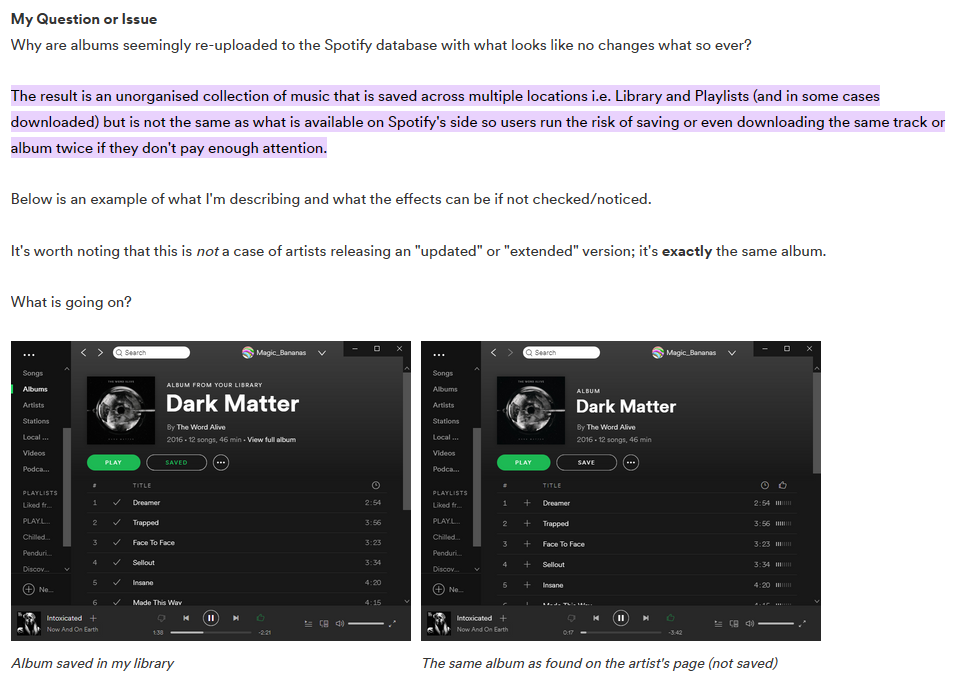

This was Spotify's first response, soon confirmed.

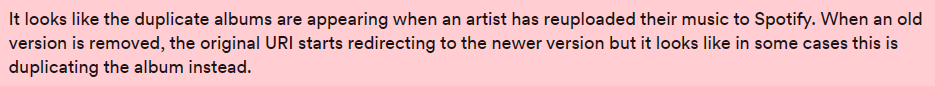

In [11]:
query14 = [ 
  {
    '$group': {
      '_id': {"artist": "$artist_id", "album": "$album_id"},
      'artist_name': {"$first": "$artist_0"},
      'album_name': {"$first": "$album_name"},
      'track_count_per_album': {'$sum': 1}
    }
  },
  {
    '$group': {
      '_id': {"artist": "$_id.artist", "album_name": "$album_name"},
      'artist_name': {"$first": "$artist_name"},
      'album_name': {"$first": "$album_name"},
      'copies_count': {'$sum': 1}
    }
  },
  {
    '$project': {
      '_id': 0,
      'artist_name': 1,
      'album_name': 1,
      'copies_count': 1
    }
  },
  { 
    '$sort': { 
      "copies_count": -1 
    } 
  }, 
  { 
    '$match': {
      "copies_count": {"$gte": 3}
    } 
  }
]

result_query14 = list(all.aggregate(query14))

In [12]:
result_query14

[{'artist_name': 'Data Punk',
  'album_name': 'Daft Punk Is Dead',
  'copies_count': 8},
 {'artist_name': 'Johann Sebastian Bach',
  'album_name': 'Bach: St. John Passion',
  'copies_count': 8},
 {'artist_name': 'Calvin Harris',
  'album_name': 'Ready For The Weekend',
  'copies_count': 6},
 {'artist_name': 'Johann Sebastian Bach',
  'album_name': 'Bach, J.S.: St. John Passion',
  'copies_count': 6},
 {'artist_name': 'Johann Sebastian Bach',
  'album_name': 'Bach, J.S.: St. John Passion, Bwv 245',
  'copies_count': 6},
 {'artist_name': 'Calvin Harris',
  'album_name': 'I Created Disco',
  'copies_count': 5},
 {'artist_name': 'Nicki Minaj',
  'album_name': 'Queen Radio: Volume 1',
  'copies_count': 5},
 {'artist_name': "Singer's Edge Karaoke",
  'album_name': 'Space Bound (Originally Performed By Eminem) [Karaoke Version]',
  'copies_count': 4},
 {'artist_name': 'Johann Sebastian Bach',
  'album_name': 'Bach: St John Passion',
  'copies_count': 4},
 {'artist_name': 'Busta Rhymes',
  'al

Our friend Data Punk really likes to release its album almost every year :-)

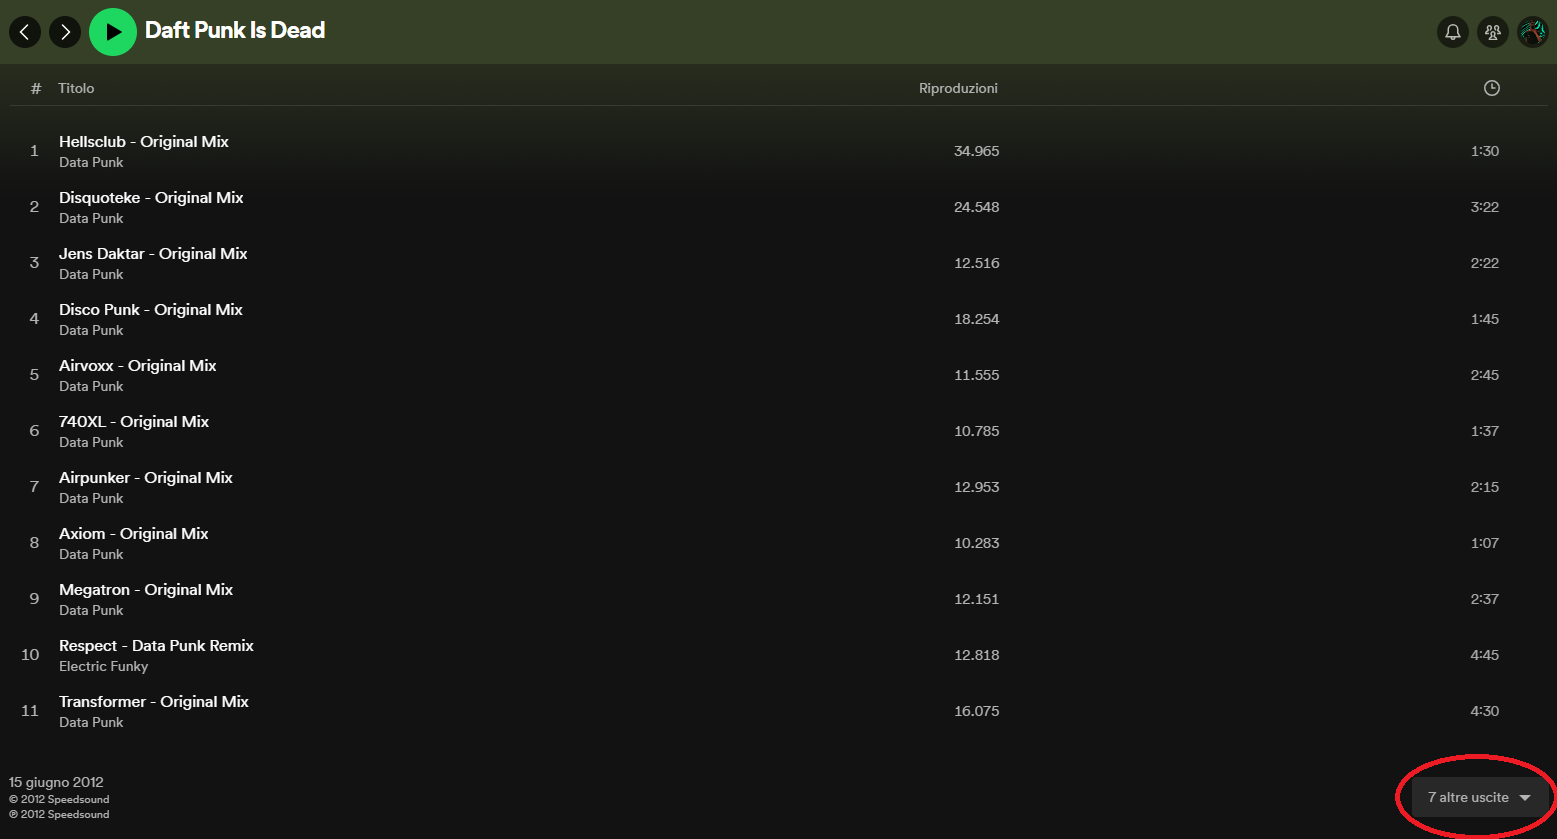

Jokes apart, most of the duplicates come from classical artists, mainstream rap/rock artists and karaoke compilations.

### DISCLAIMER: questa query si può approfondire/migliorare
Per The Weeknd, per esempio, non è proprio lo stesso identico album: lui come tutti gli altri artisti mainstream quando fanno uscire un nuovo singolo lo buttano dentro l'album precedente; per gli album di musica classica invece si tratta proprio di orchestrazioni differenti, ma il raggruppamento lo facciamo sul nome dell'opera, quindi finisce tutto insieme.

Potrebbe essere curioso vedere questa cosa sugli anni

# Query 15
## Popular artists with namesakes

Among popular artists, who has namesakes whose songs can possibly enter in autogenerated playlists for users (like Release Radar)?

In [13]:
query15 = [
  { 
    '$sort': { 
      "artist_popularity": -1 
    } 
  },
  {
    '$group': {
      '_id': "$name",
      'artist_name': {"$first": "$name"},
      'artist_popularity': {"$first": "$artist_popularity"},
      'namesakes_count': {'$sum': 1}
    }
  },
  { 
    '$match': {
      "artist_popularity": {"$gte": 70}
    } 
  },
  {
    '$project': {
      '_id': 0,
      'artist_name': 1,
      'namesakes_count': 1
    }
  },
  { 
    '$sort': { 
      "namesakes_count": -1 
    } 
  },
  { 
    '$match': {
      "namesakes_count": {"$gte": 2}
    } 
  }
]

result_query15 = list(artists.aggregate(query15))

In [14]:
result_query15

[{'artist_name': 'Chris Brown', 'namesakes_count': 8},
 {'artist_name': 'Red Velvet', 'namesakes_count': 6},
 {'artist_name': 'Miguel', 'namesakes_count': 6},
 {'artist_name': 'Sam Smith', 'namesakes_count': 5},
 {'artist_name': 'Future', 'namesakes_count': 4},
 {'artist_name': 'Nirvana', 'namesakes_count': 3},
 {'artist_name': 'Young Thug', 'namesakes_count': 3},
 {'artist_name': 'Drake', 'namesakes_count': 3},
 {'artist_name': 'TWICE', 'namesakes_count': 3},
 {'artist_name': 'Calvin Harris', 'namesakes_count': 3},
 {'artist_name': 'BTS', 'namesakes_count': 3},
 {'artist_name': 'YG', 'namesakes_count': 3},
 {'artist_name': 'Adele', 'namesakes_count': 2},
 {'artist_name': 'Tyga', 'namesakes_count': 2},
 {'artist_name': 'Michael Jackson', 'namesakes_count': 2},
 {'artist_name': 'Gunna', 'namesakes_count': 2},
 {'artist_name': 'Madonna', 'namesakes_count': 2},
 {'artist_name': 'H.E.R.', 'namesakes_count': 2},
 {'artist_name': 'B.o.B', 'namesakes_count': 2}]

Chris Brown has a lot of namesakes! Will they be as popular as him?

In [16]:
result_chrisbrown_query = list(artists.find({"name": "Chris Brown"}, {"_id": 0, "name": 1, "artist_popularity": 1})
                                      .sort({"artist_popularity": -1}))

In [17]:
result_chrisbrown_query

[{'name': 'Chris Brown', 'artist_popularity': 86},
 {'name': 'Chris Brown', 'artist_popularity': 14},
 {'name': 'Chris Brown', 'artist_popularity': 10},
 {'name': 'Chris Brown', 'artist_popularity': 1},
 {'name': 'Chris Brown', 'artist_popularity': 0},
 {'name': 'Chris Brown', 'artist_popularity': 0},
 {'name': 'Chris Brown', 'artist_popularity': 0},
 {'name': 'Chris Brown', 'artist_popularity': 0}]

Definitely no.

### BONUS: are there popular artists whose namesake is still sufficiently popular? 

In [18]:
query15_bis = [
  { 
    '$match': {
      "artist_popularity": {"$gte": 55}
    } 
  },
  {
    '$group': {
      '_id': "$name",
      'artist_name': {"$first": "$name"},
      'namesakes_count': {'$sum': 1}
    }
  },
  {
    '$project': {
      '_id': 0,
      'artist_name': 1,
      'namesakes_count': 1
    }
  },
  { 
    '$match': {
      "namesakes_count": {"$gte": 2}
    } 
  }
]

result_query15_bis = list(artists.aggregate(query15_bis))

In [19]:
result_query15_bis

[{'artist_name': 'Maxwell', 'namesakes_count': 2}]

Yes! Let's the the two Maxwells on Spotify ;)

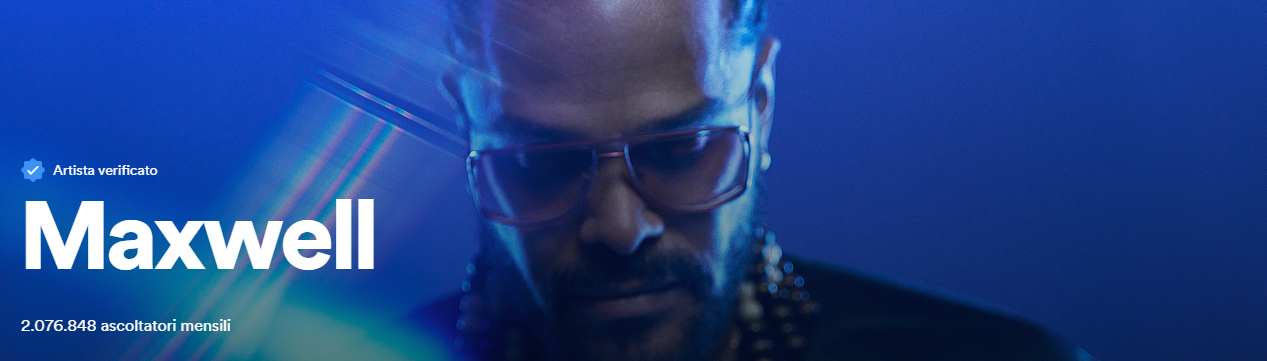

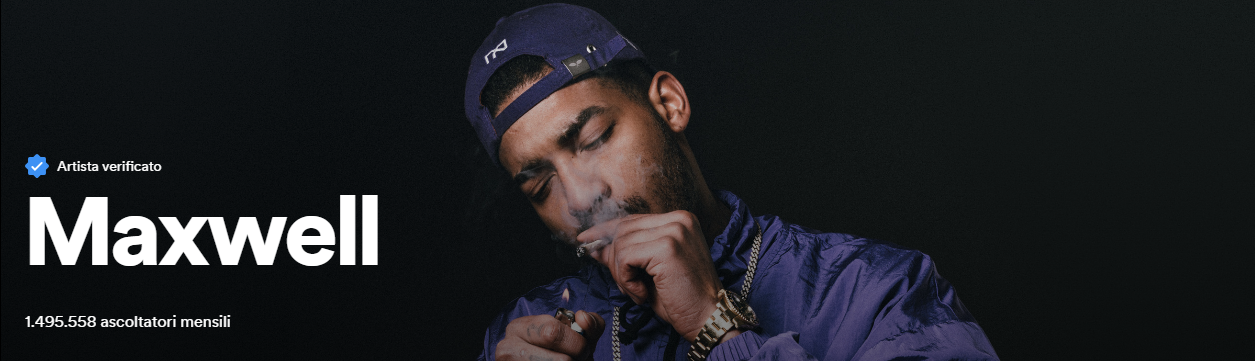

# Query  16
## Top 100 most prolific artists in the last 10 years
Considering both the tracks where they are the main artists and the ones where they are collaborators, who worked on more songs? (Not considering classical composers)

First of all, who are the most popular artists? What is their popularity score?

In [38]:
result_popularity_query = list(artists.find({}, {'_id': 0, "name": 1, "artist_popularity": 1})
                                       .sort({"artist_popularity": -1})
                                       .limit(500))

In [39]:
result_popularity_query

[{'name': 'Taylor Swift', 'artist_popularity': 100},
 {'name': 'Bad Bunny', 'artist_popularity': 95},
 {'name': 'Drake', 'artist_popularity': 95},
 {'name': 'The Weeknd', 'artist_popularity': 93},
 {'name': 'Travis Scott', 'artist_popularity': 90},
 {'name': 'Peso Pluma', 'artist_popularity': 90},
 {'name': 'Kanye West', 'artist_popularity': 90},
 {'name': 'Lana Del Rey', 'artist_popularity': 89},
 {'name': 'Eminem', 'artist_popularity': 89},
 {'name': 'Jung Kook', 'artist_popularity': 89},
 {'name': 'Ariana Grande', 'artist_popularity': 88},
 {'name': 'Future', 'artist_popularity': 88},
 {'name': '21 Savage', 'artist_popularity': 88},
 {'name': 'KAROL G', 'artist_popularity': 88},
 {'name': 'Justin Bieber', 'artist_popularity': 88},
 {'name': 'Rihanna', 'artist_popularity': 88},
 {'name': 'Junior H', 'artist_popularity': 88},
 {'name': 'SZA', 'artist_popularity': 88},
 {'name': 'Olivia Rodrigo', 'artist_popularity': 87},
 {'name': 'Ed Sheeran', 'artist_popularity': 87},
 {'name': 'Bil

A good popularity score for our analysis may be 70.

(No checks for track duplicates for the moment... can be introduced later)

In [48]:
import datetime

query16 = [
  {
    '$match': {
      'release_date': {'$gte': datetime.datetime(2013, 1, 1)}
    }
  },
  { 
    '$match': {
      "artist_popularity": {"$gte": 70}
    } 
  },
  {
    '$unwind': {
      'path': "$artists"
    }
  },
  {
    '$group': {
      '_id': "$artists",
      'artist_name': {"$first": "$artists"},
      'artist_genres': {"$first": "$artist_genres"},
      'track_count': {'$sum': 1}
    }
  },
  {
    '$unwind': {
      'path': "$artist_genres"
    }
  },
  { '$match': {"artist_genres": {'$not': {"$regex": "classical"} } } },
  { '$match': {"artist_genres": {'$not': {"$regex": "baroque"} } } },
  { '$match': {"artist_genres": {'$not': {"$regex": "romantic"} } } },
  { '$match': {"artist_genres": {'$not': {"$regex": "early music"} } } },
  {
    '$group': {
      '_id': "$artist_name",
      'artist_name': {"$first": "$artist_name"},
      'track_count': {"$first": "$track_count"}
    }
  },
  {
    '$project': {
      '_id': 0,
      'artist_name': 1,
      'track_count': 1
    }
  },
  { 
    '$sort': { 
      "track_count": -1 
    } 
  },
  { '$limit': 100 }
]

result_query16 = list(all.aggregate(query16))

In [49]:
result_query16

[{'artist_name': 'Drake', 'track_count': 700},
 {'artist_name': 'Chris Brown', 'track_count': 700},
 {'artist_name': 'Future', 'track_count': 674},
 {'artist_name': 'Lil Wayne', 'track_count': 659},
 {'artist_name': 'Taylor Swift', 'track_count': 614},
 {'artist_name': 'David Guetta', 'track_count': 607},
 {'artist_name': 'Young Thug', 'track_count': 527},
 {'artist_name': 'Nicki Minaj', 'track_count': 485},
 {'artist_name': 'Tiësto', 'track_count': 448},
 {'artist_name': 'Tyga', 'track_count': 432},
 {'artist_name': 'Eminem', 'track_count': 406},
 {'artist_name': 'The Weeknd', 'track_count': 399},
 {'artist_name': 'BTS', 'track_count': 384},
 {'artist_name': 'Migos', 'track_count': 379},
 {'artist_name': 'YG', 'track_count': 371},
 {'artist_name': 'Gunna', 'track_count': 363},
 {'artist_name': 'Snoop Dogg', 'track_count': 348},
 {'artist_name': 'Madonna', 'track_count': 328},
 {'artist_name': 'Post Malone', 'track_count': 327},
 {'artist_name': 'TWICE', 'track_count': 323},
 {'artist_

Drake is the king of keeping his name around, but it's followed soon by many other hitmakers.

### Alternate version: what about unpopular artists?

In [52]:
import datetime

query16_bis = [
  {
    '$match': {
      'release_date': {'$gte': datetime.datetime(2013, 1, 1)}
    }
  },
  { 
    '$match': {
      "artist_popularity": {"$lte": 50}
    } 
  },
  {
    '$unwind': {
      'path': "$artists"
    }
  },
  {
    '$group': {
      '_id': "$artists",
      'artist_name': {"$first": "$artists"},
      'artist_genres': {"$first": "$artist_genres"},
      'track_count': {'$sum': 1}
    }
  },
  {
    '$unwind': {
      'path': "$artist_genres"
    }
  },
  { '$match': {"artist_genres": {'$not': {"$regex": "classical"} } } },
  { '$match': {"artist_genres": {'$not': {"$regex": "baroque"} } } },
  { '$match': {"artist_genres": {'$not': {"$regex": "romantic"} } } },
  { '$match': {"artist_genres": {'$not': {"$regex": "early music"} } } },
  {
    '$group': {
      '_id': "$artist_name",
      'artist_name': {"$first": "$artist_name"},
      'track_count': {"$first": "$track_count"}
    }
  },
  {
    '$project': {
      '_id': 0,
      'artist_name': 1,
      'track_count': 1
    }
  },
  { 
    '$sort': { 
      "track_count": -1 
    } 
  },
  { '$limit': 100 }
]

result_query16_bis = list(all.aggregate(query16_bis))

In [53]:
result_query16_bis

[{'artist_name': 'Sound Healing Center', 'track_count': 4045},
 {'artist_name': '"Singers Edge Karaoke"', 'track_count': 1455},
 {'artist_name': 'SBI Audio Karaoke', 'track_count': 872},
 {'artist_name': 'White Knight Instrumental', 'track_count': 861},
 {'artist_name': 'The Karaoke Channel', 'track_count': 828},
 {'artist_name': 'Piano Dreamers', 'track_count': 676},
 {'artist_name': 'Kentong uk', 'track_count': 667},
 {'artist_name': 'Molotov Cocktail Piano', 'track_count': 661},
 {'artist_name': 'Modoo bts', 'track_count': 607},
 {'artist_name': 'Piano Project', 'track_count': 547},
 {'artist_name': 'Musical Creations Karaoke', 'track_count': 536},
 {'artist_name': 'Instrumental Rap Hip Hop', 'track_count': 527},
 {'artist_name': 'ProSound Karaoke Band', 'track_count': 476},
 {'artist_name': 'Hip Hop Type Beat', 'track_count': 473},
 {'artist_name': 'Trap House Mafia', 'track_count': 453},
 {'artist_name': 'Breezy', 'track_count': 438},
 {'artist_name': 'Edgar Allan Poe', 'track_cou

Wow, it's full of background/karaoke compilations and cover bands!

# Query 17
## Most common song titles per year (from 2000 on)
Will we see "Intro" everywhere? (Retrieving a top 10 for every year)

In [66]:
import datetime

query17 = [
  {
    '$match': {
      'release_date': {'$gte': datetime.datetime(2000, 1, 1)}
    }
  },
  {
    '$group': {
      '_id': {'year': {'$year': '$release_date'}, 'title': '$track_name'},
      'year': {"$first": {'$year': '$release_date'}},
      'title': {"$first": "$track_name"},
      'track_count': {"$sum": 1}
    }
  },
  { 
    '$sort': {
      "year": -1,
      "track_count": -1 
    } 
  },
  {
    '$group': {
      '_id': "$year",
      'songs': { '$push': {'year': "$year", 'title': "$title", 'track_count': "$track_count"} } 
    }
  },
  {
    '$project': {
      'songs': { 
        '$slice': ["$songs", 10] 
      }
    }
  },
  {
    '$unwind': {
      'path': "$songs"
    }
  },
  { 
    '$sort': {
      "_id": -1,
      "songs.track_count": -1 
    } 
  },
  {
    '$project': {
      '_id': 0,
      'songs.year': 1,
      'songs.title': 1,
      'songs.track_count': 1
    }
  }
]

result_query17 = list(all.aggregate(query17))

In [67]:
result_query17

[{'songs': {'year': 2023, 'title': 'Intro', 'track_count': 77}},
 {'songs': {'year': 2023, 'title': 'Outro', 'track_count': 29}},
 {'songs': {'year': 2023, 'title': 'Visions', 'track_count': 18}},
 {'songs': {'year': 2023, 'title': 'Alone', 'track_count': 17}},
 {'songs': {'year': 2023, 'title': 'Wait', 'track_count': 16}},
 {'songs': {'year': 2023, 'title': 'Interlude', 'track_count': 15}},
 {'songs': {'year': 2023, 'title': 'Paradise', 'track_count': 15}},
 {'songs': {'year': 2023, 'title': 'Velvet', 'track_count': 15}},
 {'songs': {'year': 2023, 'title': '7 Islands', 'track_count': 14}},
 {'songs': {'year': 2023, 'title': 'Barrio Alto', 'track_count': 14}},
 {'songs': {'year': 2022, 'title': 'Intro', 'track_count': 51}},
 {'songs': {'year': 2022, 'title': 'Outro', 'track_count': 22}},
 {'songs': {'year': 2022, 'title': 'Low', 'track_count': 17}},
 {'songs': {'year': 2022, 'title': 'Family', 'track_count': 15}},
 {'songs': {'year': 2022,
   'title': 'Wetland, Pond, Animals',
   'trac

The titles are mostly rather generic, but there are also quite a few fairly known names here and there of famous songs possibly covered by various artists or released many times to make more streams ("Bad Guy/Rap God/Californication/Billie Jean"...).

Let's plot the most common title for every year.

In [50]:
cleaned_result = [entry['songs'] for entry in result_query17]

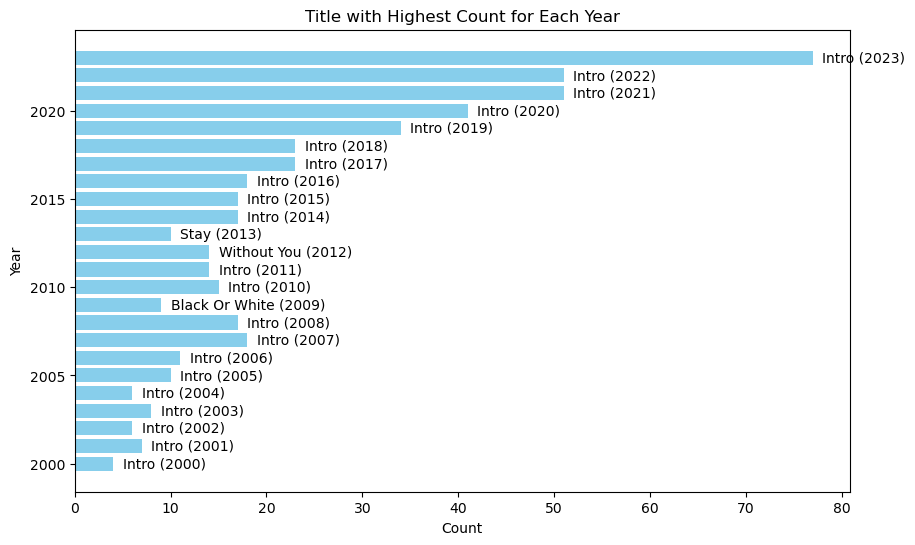

In [65]:
import matplotlib.pyplot as plt

# Create a dictionary to store the title with the highest count for each year
max_count_per_year = {}

for entry in cleaned_result:
    year = entry["year"]
    title = entry["title"]
    count = entry["track_count"]

    if year not in max_count_per_year or count > max_count_per_year[year]["count"]:
        max_count_per_year[year] = {"title": title, "count": count}

# Extract years, titles, and counts for plotting
years = list(max_count_per_year.keys())
titles = [max_count_per_year[year]["title"] for year in years]
counts = [max_count_per_year[year]["count"] for year in years]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
bars = ax.barh(years, counts, color='skyblue')

# Add titles to the right of the bars with the year in parentheses
for bar, title, year in zip(bars, titles, years):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{title} ({year})', ha='left', va='center')

ax.set_xlabel('Count')
ax.set_ylabel('Year')
ax.set_title('Title with Highest Count for Each Year')

plt.show()

There's a clear predominance of the unimaginative title "Intro", but it's not the only one!

Moreover, we can see an exponential increase of the number of songs being released in the last years.

# Query 18
## THE bands
How many bands dropping songs between the 60s and the 80s are called "The..."?

In [90]:
query18 = [
  {
    '$match': {
      'release_date': {'$gte': datetime.datetime(1960, 1, 1)}
    }
  },
  {
    '$match': {
      'release_date': {'$lte': datetime.datetime(1989, 12, 31)}
    }
  },
  {
    '$facet': {
        "the_bands": [
            { '$match': {"artist_0": {"$regex": "^The "}} },
            { '$group': { '_id': "$artist_0"}},
            { '$project': { '_id': 0, "the_name": "$_id"}}
        ],
        "the_bands_count": [
            { '$match': {"artist_0": {"$regex": "^The "}} },
            { '$group': { '_id': {"the_group": "$artist_0", "the_id": "$artist_id"}, 
                          'the_tracks_count': {'$sum': 1}}},
            { '$group': { '_id': "$_id.the_group", 
                          'the_duplicated_count': {'$sum': 1}}},
            { '$group': { '_id': True, 
                          'the_unique_count': {'$sum': 1}}},
            { '$project': { '_id': 0, 'the_unique_count': 1}}
#            { '$project': { '_id': 1, 'the_duplicated_count': 1}}
        ]
    }
  }
]

result_query18 = list(all.aggregate(query18))

In [91]:
result_query18

[{'the_bands': [{'the_name': 'The Box Tops'},
   {'the_name': 'The New Foundations'},
   {'the_name': 'The Black Velvet Band'},
   {'the_name': 'The Cascades'},
   {'the_name': 'The Guess Who'},
   {'the_name': 'The Smiths'},
   {'the_name': 'The "Evening with Alan Jay Lerner" Company'},
   {'the_name': 'The Busters'},
   {'the_name': 'The Beatles'},
   {'the_name': 'The Soul Children'},
   {'the_name': 'The Soul Stirrers'},
   {'the_name': "The B-52's"},
   {'the_name': 'The Blow Monkeys'},
   {'the_name': 'The Righteous Brothers'},
   {'the_name': 'The Legendary Blues Band'},
   {'the_name': 'The Chi-Lites'},
   {'the_name': 'The Bluegrass Cardinals'},
   {'the_name': 'The Romantics'},
   {'the_name': 'The Kingsmen'},
   {'the_name': 'The Yardbirds'},
   {'the_name': 'The Supremes'},
   {'the_name': 'The My Fair Lady Company'},
   {'the_name': 'The Waitresses'},
   {'the_name': 'The Moody Blues'},
   {'the_name': 'The Temptations'},
   {'the_name': "The St. John's Inspirational Choir

Unfortunately, the legendary "The The" is not present in the database :(

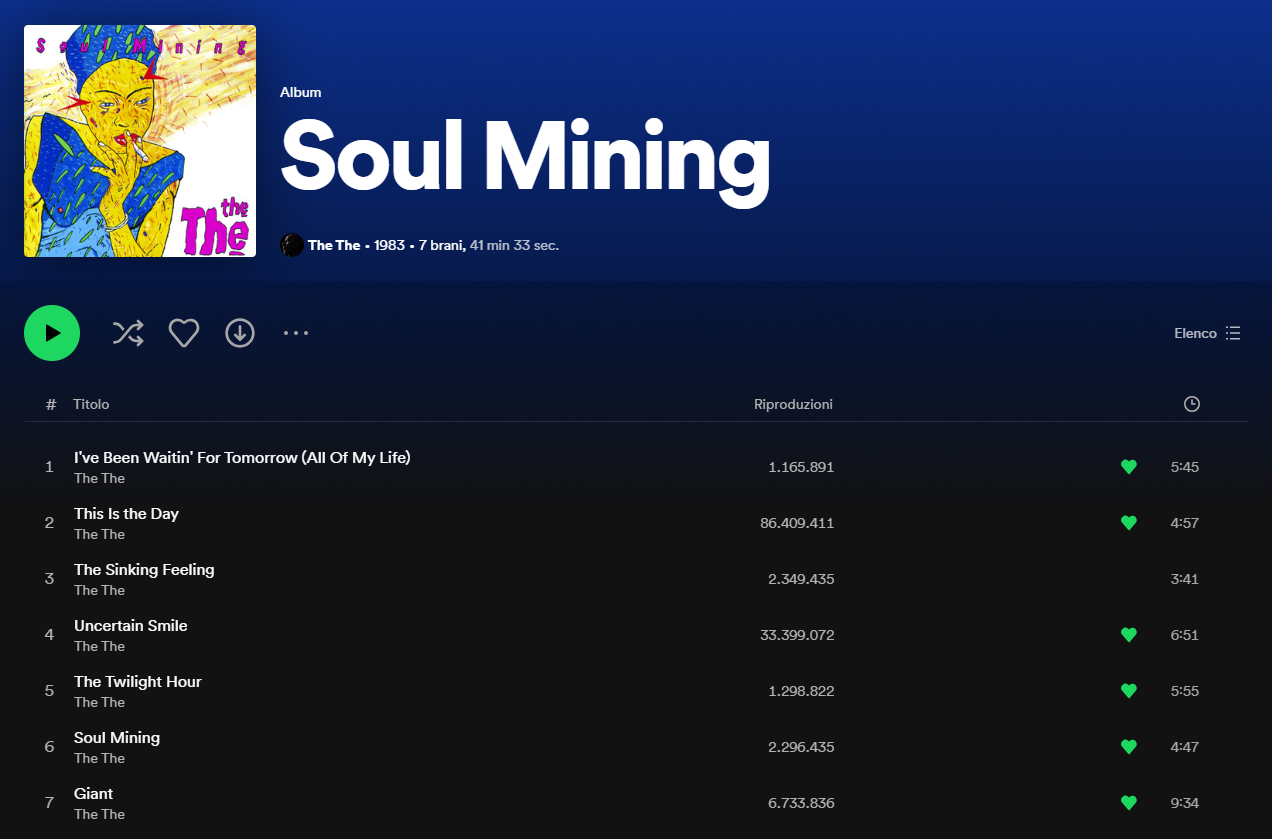

# Query 19
## Popular artists who tend to release more singles than albums
Most of the artists are used to release 3/4 singles before the album these singles are taken from is out, but there may be artists who don't follow this "rule": let's see who they are!

In [105]:
query19 = [
  { 
    '$match': {
      "artist_popularity": {"$gte": 70}
    } 
  },
  {
    '$group': {
      '_id': "$artist_id",
      'artist_name': {"$first": "$artist_0"},
      'singles_count': {
          '$sum': {
            '$cond': [{'$eq': ['$album_type', "single"]}, 1, 0]
          }
      },
      'total_count': {'$sum': 1}
    }
  },
  {
    '$project': {
      '_id': 0,
      'artist_name': 1,
      'singles_percentage': {
        '$multiply': [{'$divide': ['$singles_count', '$total_count']}, 100]
      },
      'total_count': 1
    }
  },
  { 
    '$sort': {
      "singles_percentage": -1,
      "total_count": -1 
    } 
  },
  { 
    '$match': {
      "total_count": {"$gte": 10}
    } 
  },
]

result_query19 = list(all.aggregate(query19))

In [106]:
result_query19

[{'artist_name': 'Joel Corry', 'total_count': 38, 'singles_percentage': 100.0},
 {'artist_name': 'Charlie Puth',
  'total_count': 31,
  'singles_percentage': 100.0},
 {'artist_name': 'Kim Petras', 'total_count': 31, 'singles_percentage': 100.0},
 {'artist_name': 'Clean Bandit',
  'total_count': 27,
  'singles_percentage': 100.0},
 {'artist_name': 'DJ Khaled', 'total_count': 24, 'singles_percentage': 100.0},
 {'artist_name': 'Coldplay', 'total_count': 23, 'singles_percentage': 100.0},
 {'artist_name': 'Kygo', 'total_count': 19, 'singles_percentage': 100.0},
 {'artist_name': 'Martin Garrix',
  'total_count': 18,
  'singles_percentage': 100.0},
 {'artist_name': 'DJ Snake', 'total_count': 16, 'singles_percentage': 100.0},
 {'artist_name': 'Diplo', 'total_count': 14, 'singles_percentage': 100.0},
 {'artist_name': 'Ed Sheeran', 'total_count': 14, 'singles_percentage': 100.0},
 {'artist_name': 'Rita Ora', 'total_count': 13, 'singles_percentage': 100.0},
 {'artist_name': 'Zara Larsson',
  'tot

Although the database is incomplete (Ed Sheeran has released several albums, as well as Coldplay, for example), the trend is pretty clear: the ones who tend to release more singles than albums are DJs or newly-born popstars.

# Query 20
## Most energetic punk subgenres
"Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale."

For our analysis, we will take into consideration only those punk subgenres that may be safely considered the "main" ones.

In [133]:
query20 = [
  {
    "$unwind": "$artist_genres",
  },
  { 
    '$match': {
      "artist_genres": {"$regex": "punk"}
    } 
  },
  {
    "$group": {
      "_id": "$artist_genres",
      "average_energy": {"$avg": "$energy"},
      "average_popularity": {"$avg": "$track_popularity"},
      "track_count": {"$sum": 1}
    },
  },
  { 
    '$match': {
      "track_count": {"$gte": 60}
    } 
  },
  { 
    '$match': {
      "average_popularity": {"$gte": 10}
    } 
  },
  {
    '$project': {
      '_id': 0,
      'subgenre': "$_id",
      'average_energy': 1,
    }
  },
  { 
    '$sort': {
      "average_energy": -1,
    } 
  },
]

result_query20 = list(all.aggregate(query20))

In [ ]:
result_query20

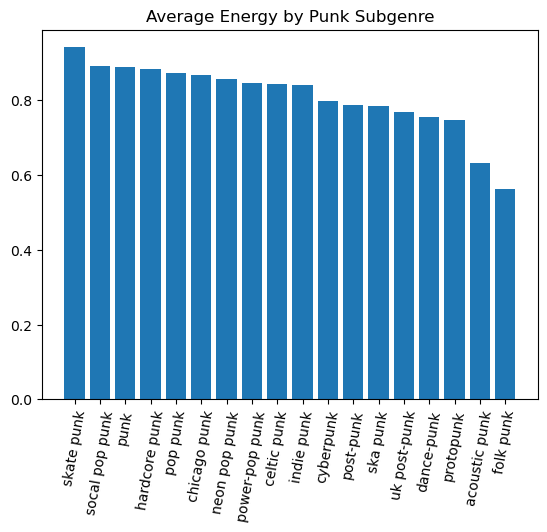

In [141]:
# Extracting subgenres and average energies from the data
subgenres = [entry["subgenre"] for entry in result_query20]
average_energies = [entry["average_energy"] for entry in result_query20]

# Plotting
plt.bar(subgenres, average_energies)
plt.title('Average Energy by Punk Subgenre')
plt.xticks(rotation=80)
plt.show()

The resuts are pretty reasonable: the top-half is filled with pop-punk subgenres, which are usually upbeat, and the more aggressive harcore punk; then we find the celtic punk of The Pogues, still really enegertic, and, as we proceed, the moodier post-punk; finally, acousticness takes over and, according to the score, energy disappears.